## Clasificacion de flores Iris

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X = iris.data[:,:2]  #Tomamos sólo las columnas 0 y 1 que son los pétalos, que anteriormente se vio que eran los parámetros 
                     #dominantes
Y = iris.target

In [4]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

h = (x_max-x_min)/100

xx,yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))         #La función arange es un tipo de linspace

X_plot = np.c_[xx.ravel(), yy.ravel()]       #.ravel() convierte en una fila todos los datos de una matriz o vector
## np.c_[a,b]  concatena los valores de a con b, es decir, une el primer valor de a con el de b, el segundo con el segundo...

In [5]:
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [1]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize = (16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Set1)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris, con kernel linear")

NameError: name 'svm' is not defined

C:\Users\CAMILO\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de Iris, con kernel radial (rbf)')

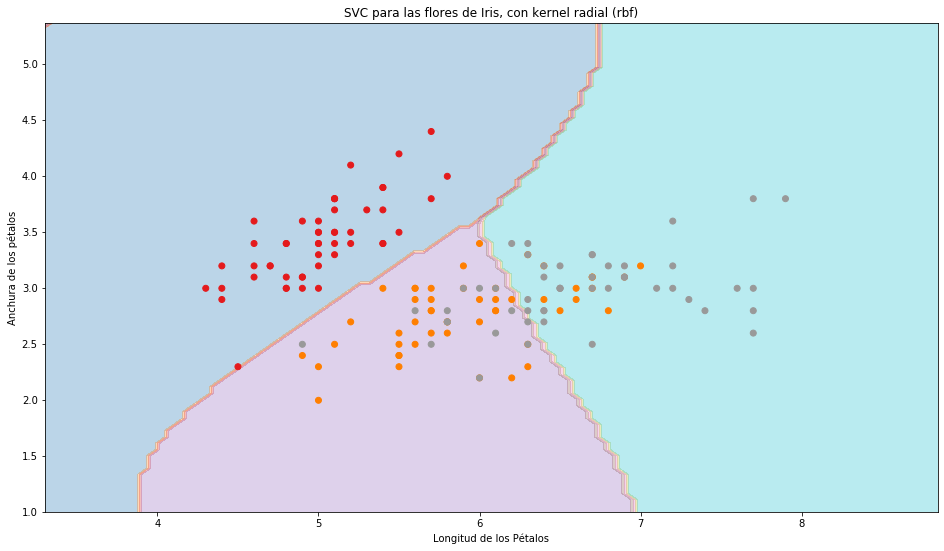

In [8]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize = (16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Set1)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris, con kernel radial (rbf)")

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [10]:
X, Y = shuffle(X,Y, random_state=0)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [13]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        "C": [1,10,100,1000]
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000]
    }
]

In [15]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]

for m, s, p in zip(means, stds, params):
    print(" %0.3f +/- %0.3f para %r" %(m,s,p))

 0.747 +/- 0.062 para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
 0.747 +/- 0.062 para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
 0.747 +/- 0.062 para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
 0.807 +/- 0.065 para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
 0.787 +/- 0.062 para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
 0.780 +/- 0.058 para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
 0.747 +/- 0.062 para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
 0.747 +/- 0.062 para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
 0.813 +/- 0.062 para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
 0.773 +/- 0.049 para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
 0.780 +/- 0.058 para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
 0.767 +/- 0.063 para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
 0.747 +/- 0.062 para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
 0.813 +/- 0.062 para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
 0.760 +/- 0.053 para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
 0.780 +/- 0.040 para {'C': 100, 'gamma'

In [26]:
y_pred = clf.predict(X_test)

In [29]:
clasificac = classification_report(Y_test, y_pred, target_names=["setosas", "versicolor", "virginica"])
print(clasificac)

              precision    recall  f1-score   support

     setosas       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Resumen final de la clasificación de Iris

In [9]:
def svm_iris(C=1.0, gamma= 0.01, kernel="rbf"):
    
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    X = iris.data[:,:2]  #Tomamos sólo las columnas 0 y 1 que son los pétalos, que anteriormente se vio que eran los parámetros 
                     #dominantes
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    h = (x_max-x_min)/100

    xx,yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))         #La función arange es un tipo de linspace

    X_plot = np.c_[xx.ravel(), yy.ravel()] 
    
    
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    

    plt.figure(figsize = (16,9))
    plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Set1)
    plt.xlabel("Longitud de los Pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris, con kernel "+ kernel)

In [10]:
from ipywidgets import interact, fixed

In [12]:
interact(svm_iris, C=[0.01, 0.1, 1, 10, 100, 1000, 10e6],
        gamma=[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5, 0.99],
        kernel=["rbf", "linear", "sigmoid", "poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 10000000.0), va…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>